# Bayesian analyses and MCMC

## Defining priors

In [1]:
from likelihood import Priors, LikelihoodFunction
from equations import DM_EXT_model

model = DM_EXT_model()

# Defining the prior intervals manually
intervals_constant = [(0, 300), (-9, 5), (0, 1)]  # H_0, A, beta, f_IGM
distributions_constant = ['gaussian', 'uniform', 'uniform']

intervals_p2 = [(0, 300), (-9, 5), (0, 1), (0, 5)]  # H_0, A, beta, f_IGM, alpha
distributions_p2 = ['gaussian', 'uniform', 'gaussian', 'gaussian']

"""intervals_p3 = [(40, 120), (0, 300), (-9, 5), (-3, 0), (-3, 3)]  # H_0, Omega_m, omega_0, omega_a
distributions_p3 = ['gaussian', 'gaussian', 'uniform', 'gaussian', 'gaussian']"""

# Creating specific instances of the priors
P_constant = Priors(['A', '\\beta', 'f_{IGM}'], intervals_constant, distributions_constant)
P_p2 = Priors(['A', '\\beta', 'f_{IGM}', '\\alpha'], intervals_p2, distributions_p2)
#P_p3 = Priors(['H_0', 'A', '\\beta', '\\omega_0', '\\omega_a'], intervals_p3, distributions_p3)

# Creating an instance of the likelihood model
LF_constant = LikelihoodFunction(
    lambda z, A, beta, f_IGM: model.DM_ext_th(
        z=z,
        f_IGM=f_IGM,
        model_type='constant',
        Omega_b=None,  
        Omega_m=None,     
        H_today=None,
        A=A,
        beta=beta,
        omega_0=None,
        cosmo_type='standard',
        param_type='constant'
    )
)

LF_p2 = LikelihoodFunction(
    lambda z, A, beta, f_IGM, alpha: model.DM_ext_th(
        z=z,
        f_IGM=f_IGM,
        model_type='p2',
        Omega_b=None,  
        Omega_m=None,     
        H_today=None,
        A=A,
        beta=beta,
        param=alpha,
        omega_0=None,
        cosmo_type='standard',
        param_type='constant'
    )
)

"""LF_p3 = LikelihoodFunction(
    lambda z, H_0, A, beta, omega_0, omega_a: model.DM_ext_th(
        z=z,
        f_IGM=0.83,
        #DM_host_0=96*(1+z)**0.83,
        model_type='constant',
        Omega_b=None,  
        Omega_m=None,     
        H_today=H_0,
        A=A,
        beta=beta,
        omega_0=omega_0,  
        omega_a=omega_a,
        cosmo_type='non_standard',
        param_type='BA'
    )
)"""

"LF_p3 = LikelihoodFunction(\n    lambda z, H_0, A, beta, omega_0, omega_a: model.DM_ext_th(\n        z=z,\n        f_IGM=0.83,\n        #DM_host_0=96*(1+z)**0.83,\n        model_type='constant',\n        Omega_b=None,  \n        Omega_m=None,     \n        H_today=H_0,\n        A=A,\n        beta=beta,\n        omega_0=omega_0,  \n        omega_a=omega_a,\n        cosmo_type='non_standard',\n        param_type='BA'\n    )\n)"

## Preparing the samples

### Analysis for 16 FRBs

In [2]:
from obs_data import FRB_data
import ultranest

# Instantiate the FRB_data class for 16 FRBs
frb_data_16 = FRB_data(n_frb=16)

# Call the select_data method to get the observed data
z_obs_16, DM_obs_ext_16, DM_obs_ext_error_16 = frb_data_16.select_data()

z_values_16 = z_obs_16
dm_ext_obs_16 = DM_obs_ext_16
dm_ext_errors_16 =  DM_obs_ext_error_16

# Configuring the ultranest samplers
sampler_constant_16 = ultranest.ReactiveNestedSampler(
    P_constant.param_names,
    lambda params: LF_constant.log_likelihood(
        params,
        z_values=z_values_16,
        y_obs=dm_ext_obs_16,
        errors=dm_ext_errors_16
    ),
    P_constant.prior_transform
)

sampler_p2_16 = ultranest.ReactiveNestedSampler(
    P_p2.param_names,
    lambda params: LF_p2.log_likelihood(
        params,
        z_values=z_values_16,
        y_obs=dm_ext_obs_16,
        errors=dm_ext_errors_16
    ),
    P_p2.prior_transform
)

"""sampler_p3_16 = ultranest.ReactiveNestedSampler(
    P_p3.param_names,
    lambda params: LF_p3.log_likelihood(
        params,
        z_values=z_values_16,
        y_obs=dm_ext_obs_16,
        errors=dm_ext_errors_16
    ),
    P_p3.prior_transform
)"""

'sampler_p3_16 = ultranest.ReactiveNestedSampler(\n    P_p3.param_names,\n    lambda params: LF_p3.log_likelihood(\n        params,\n        z_values=z_values_16,\n        y_obs=dm_ext_obs_16,\n        errors=dm_ext_errors_16\n    ),\n    P_p3.prior_transform\n)'

### Analysis for 50 FRBs

In [3]:
"""# Instantiate the FRB_data class for 50 FRBs
frb_data_50 = FRB_data(n_frb=50)

# Call the select_data method to get the observed data
z_obs_50, DM_obs_ext_50, error_plus_50, error_minus_50 = frb_data_50.select_data()

z_values_50 = z_obs_50
dm_ext_obs_50 = DM_obs_ext_50
dm_error_plus_50 =  error_plus_50
dm_error_minus_50 =  error_minus_50

# Configuring the ultranest samplers
sampler_constant_50 = ultranest.ReactiveNestedSampler(
    P_constant.param_names,
    lambda params: LF_constant.log_likelihood(
        params,
        z_values=z_values_50,
        y_obs=dm_ext_obs_50,
        err_pos=error_plus_50,
        err_neg=error_minus_50
    ),
    P_constant.prior_transform
)

sampler_p2_50 = ultranest.ReactiveNestedSampler(
    P_p2.param_names,
    lambda params: LF_p2.log_likelihood(
        params,
        z_values=z_values_50,
        y_obs=dm_ext_obs_50,
        err_pos=error_plus_50,
        err_neg=error_minus_50
    ),
    P_p2.prior_transform
)

sampler_p3_50 = ultranest.ReactiveNestedSampler(
    P_p3.param_names,
    lambda params: LF_p3.log_likelihood(
        params,
        z_values=z_values_50,
        y_obs=dm_ext_obs_50,
        err_pos=error_plus_50,
        err_neg=error_minus_50
    ),
    P_p3.prior_transform
)"""

'# Instantiate the FRB_data class for 50 FRBs\nfrb_data_50 = FRB_data(n_frb=50)\n\n# Call the select_data method to get the observed data\nz_obs_50, DM_obs_ext_50, error_plus_50, error_minus_50 = frb_data_50.select_data()\n\nz_values_50 = z_obs_50\ndm_ext_obs_50 = DM_obs_ext_50\ndm_error_plus_50 =  error_plus_50\ndm_error_minus_50 =  error_minus_50\n\n# Configuring the ultranest samplers\nsampler_constant_50 = ultranest.ReactiveNestedSampler(\n    P_constant.param_names,\n    lambda params: LF_constant.log_likelihood(\n        params,\n        z_values=z_values_50,\n        y_obs=dm_ext_obs_50,\n        err_pos=error_plus_50,\n        err_neg=error_minus_50\n    ),\n    P_constant.prior_transform\n)\n\nsampler_p2_50 = ultranest.ReactiveNestedSampler(\n    P_p2.param_names,\n    lambda params: LF_p2.log_likelihood(\n        params,\n        z_values=z_values_50,\n        y_obs=dm_ext_obs_50,\n        err_pos=error_plus_50,\n        err_neg=error_minus_50\n    ),\n    P_p2.prior_transfor

### Analysis for 64 FRBs

In [4]:
# Instantiate the FRB_data class for 63 FRBs
frb_data_63 = FRB_data(n_frb=63)

# Call the select_data method to get the observed data
z_obs_63, DM_obs_ext_63, DM_obs_ext_error_63 = frb_data_63.select_data()

z_values_63 = z_obs_63
dm_ext_obs_63 = DM_obs_ext_63
dm_ext_errors_63 =  DM_obs_ext_error_63

# Configuring the ultranest samplers
sampler_constant_63 = ultranest.ReactiveNestedSampler(
    P_constant.param_names,
    lambda params: LF_constant.log_likelihood(
        params,
        z_values=z_values_63,
        y_obs=dm_ext_obs_63,
        errors=dm_ext_errors_63
    ),
    P_constant.prior_transform
)

sampler_p2_63 = ultranest.ReactiveNestedSampler(
    P_p2.param_names,
    lambda params: LF_p2.log_likelihood(
        params,
        z_values=z_values_63,
        y_obs=dm_ext_obs_63,
        errors=dm_ext_errors_63
    ),
    P_p2.prior_transform
)

"""sampler_p3_63 = ultranest.ReactiveNestedSampler(
    P_p3.param_names,
    lambda params: LF_p3.log_likelihood(
        params,
        z_values=z_values_63,
        y_obs=dm_ext_obs_63,
        errors=dm_ext_errors_63
    ),
    P_p3.prior_transform
)"""

'sampler_p3_63 = ultranest.ReactiveNestedSampler(\n    P_p3.param_names,\n    lambda params: LF_p3.log_likelihood(\n        params,\n        z_values=z_values_63,\n        y_obs=dm_ext_obs_63,\n        errors=dm_ext_errors_63\n    ),\n    P_p3.prior_transform\n)'

In [5]:
result1_16 = sampler_constant_16.run(min_num_live_points=400)
sampler_constant_16.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5  3 [-4.6643..-4.6642]*| it/evals=2840/8233 eff=36.2569% N=400 0  
[ultranest] Likelihood function evaluations: 8280
[ultranest]   logZ = -7.192 +- 0.04301
[ultranest] Effective samples strategy satisfied (ESS = 1543.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.05 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.04, need <0.5)
[ultranest]   logZ error budget: single: 0.06 bs:0.04 tail:0.01 total:0.04 required:<0.50
[ultranest] done iterating.

logZ = -7.191 +- 0.080
  single instance: logZ = -7.191 +- 0.062
  bootstrapped   : logZ = -7.192 +- 0.079
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    A                   : -2    │ ▁▁ ▁▁▁▁▁▁▁▂▃▄▄▆▆▇▇▇▇▇▆▅▄▄▃▃▂▁▁▁▁▁▁ ▁▁ │303       153 +- 37
    \beta               : -9.0  │▂▂▂▂▃▂▃▂▃▄▅▄▄▄▅▆▅▄▅▆▅▆▆▆▇▆▆▇▄▆▆▆▄▂▁▁▁ ▁│5.0       -1.9 +- 3.0
    f_{IGM}             : 0.00  │▂▁▁▂▂▁▂▂▂▂▂▂▁▃▃▂▃

In [6]:
"""result1_50 = sampler_constant_50.run(min_num_live_points=400)
sampler_constant_50.print_results()"""

'result1_50 = sampler_constant_50.run(min_num_live_points=400)\nsampler_constant_50.print_results()'

In [7]:
result1_63 = sampler_constant_63.run(min_num_live_points=400)
sampler_constant_63.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-8e+01   [-76.0113..-76.0113]*| it/evals=3751/8527 eff=46.1548% N=400   
[ultranest] Likelihood function evaluations: 8527
[ultranest]   logZ = -80.75 +- 0.07738
[ultranest] Effective samples strategy satisfied (ESS = 1706.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.09 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.

logZ = -80.768 +- 0.173
  single instance: logZ = -80.768 +- 0.094
  bootstrapped   : logZ = -80.746 +- 0.173
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    A                   : 91    │ ▁▁▁▁▁▁▁▁▂▂▂▄▄▅▆▇▇▇▇▇▇▅▅▃▄▃▂▂▁▁▁▁▁▁▁▁▁ │209       149 +- 15
    \beta               : -4.5  │ ▁    ▁▁▁▁▁▁▁▁▂▂▃▃▅▅▅▆▇▇▇▇▇▇▇▆▆▇▄▃▂▁▁▁ │3.5       0.6 +- 1.1
    f_{IGM}             : 0.00  │▁ ▁ ▁▁▁▁▁▁▁

In [8]:
result2_16 = sampler_p2_16.run(min_num_live_points=400)
sampler_p2_16.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5  1 [-4.8472..-4.8468]*| it/evals=3360/21364 eff=16.0275% N=400   
[ultranest] Likelihood function evaluations: 21405
[ultranest]   logZ = -8.597 +- 0.05532
[ultranest] Effective samples strategy satisfied (ESS = 1975.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.06, need <0.5)
[ultranest]   logZ error budget: single: 0.07 bs:0.06 tail:0.01 total:0.06 required:<0.50
[ultranest] done iterating.

logZ = -8.588 +- 0.096
  single instance: logZ = -8.588 +- 0.072
  bootstrapped   : logZ = -8.597 +- 0.095
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    A                   : 40    │ ▁▁▁▁▁▁▁▂▂▃▄▄▆▆▇▇▇▇▇▇▆▆▅▅▃▃▃▂▁▁▁▁ ▁▁▁▁ │303       166 +- 37
    \beta               : -9.0  │▁▁▁▁▁▂▁▁▂▂▂▂▃▄▄▄▄▅▅▆▆▇▇▆▅▆▄▄▃▂▂▁▁▁▁  ▁ │4.4       -2.3 +- 2.2
    f_{IGM}             : -0.03 │ ▁▁▁▁▁▁▁▁▂▂▃▄▄▅▆

In [ ]:
"""result2_50 = sampler_p2_50.run(min_num_live_points=400)
sampler_p2_50.print_results()"""

In [9]:
result2_63 = sampler_p2_63.run(min_num_live_points=400)
sampler_p2_63.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7e+01   [-76.0172..-76.0166]*| it/evals=5400/36487 eff=14.9638% N=400  
[ultranest] Likelihood function evaluations: 36487
[ultranest]   logZ = -84.69 +- 0.09333
[ultranest] Effective samples strategy satisfied (ESS = 2639.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.09, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.09 tail:0.01 total:0.09 required:<0.50
[ultranest] done iterating.

logZ = -84.669 +- 0.126
  single instance: logZ = -84.669 +- 0.117
  bootstrapped   : logZ = -84.688 +- 0.126
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    A                   : 106   │ ▁▁▁▁▁▁▁▂▂▃▃▄▅▆▆▇▇▇▆▆▆▇▄▄▃▂▂▁▁▁▁▁▁▁▁ ▁ │221       160 +- 16
    \beta               : -3.46 │ ▁   ▁▁▁▁▁▁▁▁▁▁▂▂▃▃▄▄▆▅▇▇▇▇▇▆▅▄▃▂▂▁▁▁▁ │3.36      0.81 +- 0.86
    f_{IGM}             : 0.04  │ ▁▁▁▁▁▁▁

In [ ]:
"""result3_16 = sampler_p3_16.run(min_num_live_points=400)
sampler_p3_16.print_results()"""

In [ ]:
"""result3_50 = sampler_p3_50.run(min_num_live_points=400)
sampler_p3_50.print_results()"""

In [ ]:
"""result3_63 = sampler_p3_63.run(min_num_live_points=400)
sampler_p3_63.print_results()"""

In [10]:
from getdist import plots, MCSamples

# Extraindo amostras dos resultados
samples1_16 = result1_16['samples']
samples2_16 = result2_16['samples']
#samples3_16 = result3_16['samples']

"""samples1_50 = result1_50['samples']
samples2_50 = result2_50['samples']
samples3_50 = result3_50['samples']"""

samples1_63 = result1_63['samples']
samples2_63 = result2_63['samples']
#samples3_63 = result3_63['samples']

# Criando objetos MCSamples com os dados
labels1 = P_constant.param_names
names1 = P_constant.param_names
mcsamples1_16 = MCSamples(samples=samples1_16, names=names1, labels=labels1)
#mcsamples1_50 = MCSamples(samples=samples1_50, names=names1, labels=labels1)
mcsamples1_63 = MCSamples(samples=samples1_63, names=names1, labels=labels1)

labels2 = P_p2.param_names
names2 = P_p2.param_names
mcsamples2_16 = MCSamples(samples=samples2_16, names=names2, labels=labels2)
#mcsamples2_50 = MCSamples(samples=samples2_50, names=names2, labels=labels2)
mcsamples2_63 = MCSamples(samples=samples2_63, names=names2, labels=labels2)

#mcsamples3_16 = MCSamples(samples=samples3_16, names=names2, labels=labels2)
#mcsamples3_50 = MCSamples(samples=samples3_50, names=names2, labels=labels2)
#mcsamples3_63 = MCSamples(samples=samples3_63, names=names2, labels=labels2)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


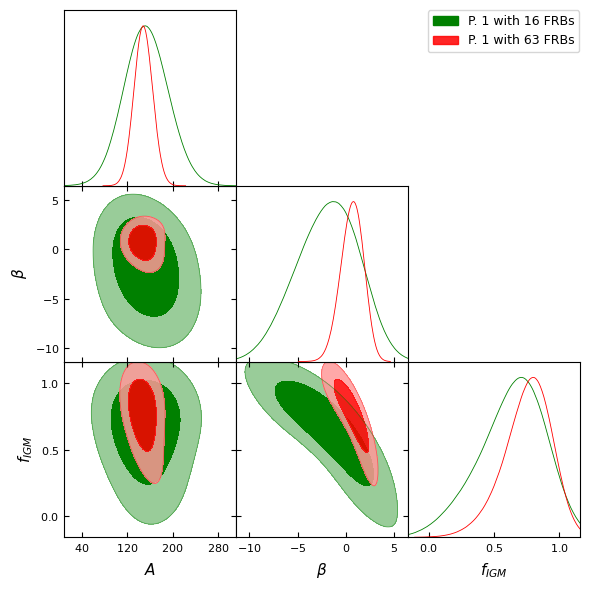

In [11]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples1_16.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
mcsamples1_63.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot([mcsamples1_16, mcsamples1_63], filled=True, contour_colors=['green', 'red'], 
                legend_labels=['P. 1 with 16 FRBs', 'P. 1 with 63 FRBs'],) 
                #title_limit=1)
g.export('Figuras/f_igm_param_constant.png', dpi=600)

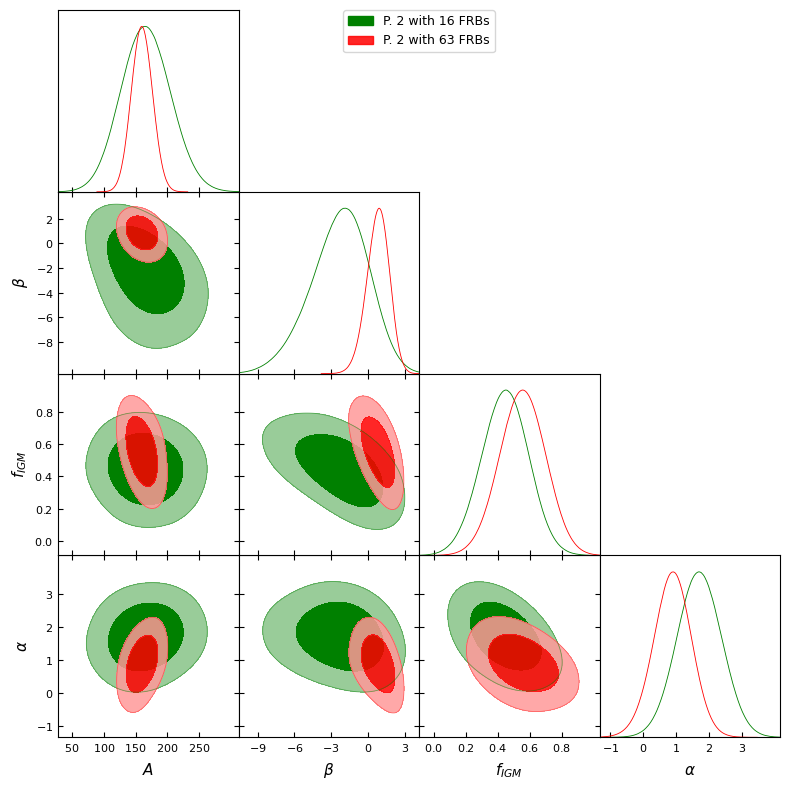

In [12]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples2_16.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
mcsamples2_63.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot([mcsamples2_16, mcsamples2_63], filled=True, contour_colors=['green', 'red'], 
                legend_labels=['P. 2 with 16 FRBs', 'P. 2 with 63 FRBs'],) 
                #title_limit=1)
g.export('Figuras/f_igm_param_2.png', dpi=600)

In [ ]:
"""# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples3_16.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
mcsamples3_63.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot([mcsamples3_16, mcsamples3_63], filled=True, contour_colors=['green', 'red'], 
                legend_labels=['BA with 16 FRBs', 'BA with 50 FRBs'],) 
                #title_limit=1)
g.export('Figuras/param_BA.png', dpi=600)"""

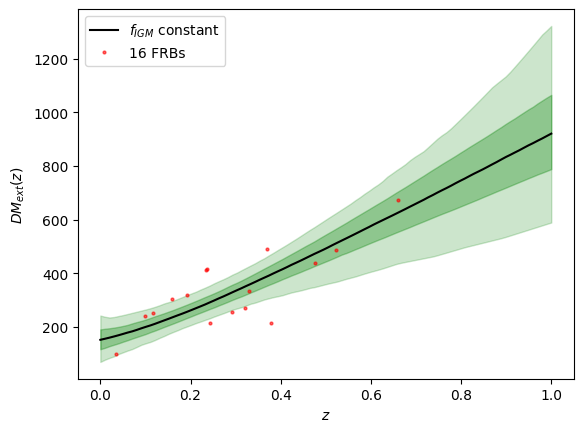

In [18]:
from ultranest.plot import PredictionBand
from equations import DM_EXT_model
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.xlabel('$z$')
plt.ylabel('$DM_{ext}(z)$')
plt.errorbar(x=z_values_16, y=dm_ext_obs_16, fmt='o', alpha=0.6, color='red', label='16 FRBs', ms=2)

z_test = np.linspace(0, 1, 100)

band = PredictionBand(z_test)
model_fit = DM_EXT_model()
# go through the solutions
for A, beta, f_IGM  in sampler_constant_16.results['samples']:
    # compute for each time the y value
    band.add(model_fit.DM_ext_th(z=z_test,
        f_IGM=f_IGM,
        model_type='constant',
        Omega_b=None,  
        Omega_m=None,     
        H_today=None,
        A=A,
        beta=beta,
        omega_0=None,
        cosmo_type='standard',
        param_type='constant'))

band.line(color='k', linestyle='-', label='$f_{IGM}~$constant', linewidth=1.5)
# add 1 sigma quantile
band.shade(color='green', alpha=0.3)
# add wider quantile (0.01 .. 0.99)
band.shade(q=0.49, color='green', alpha=0.2)

plt.legend()
plt.savefig('Figuras/DM_ext_bestfit_f_IGM_16.png', format='png', dpi=600)

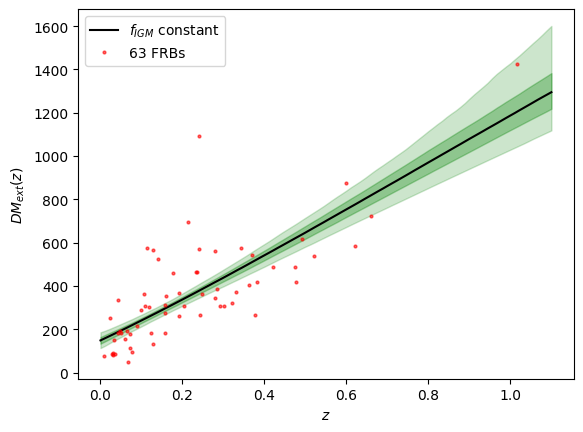

In [19]:
from ultranest.plot import PredictionBand
from equations import DM_EXT_model
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.xlabel('$z$')
plt.ylabel('$DM_{ext}(z)$')
plt.errorbar(x=z_values_63, y=dm_ext_obs_63, fmt='o', alpha=0.6, color='red', label='63 FRBs', ms=2)

z_test = np.linspace(0, 1.1, 100)

band = PredictionBand(z_test)
model_fit = DM_EXT_model()
# go through the solutions
for A, beta, f_IGM  in sampler_constant_63.results['samples']:
    # compute for each time the y value
    band.add(model_fit.DM_ext_th(z=z_test,
        f_IGM=f_IGM,
        model_type='constant',
        Omega_b=None,  
        Omega_m=None,     
        H_today=None,
        A=A,
        beta=beta,
        omega_0=None,
        cosmo_type='standard',
        param_type='constant')
    )

band.line(color='k', linestyle='-', label='$f_{IGM}~$constant', linewidth=1.5)
# add 1 sigma quantile
band.shade(color='green', alpha=0.3)
# add wider quantile (0.01 .. 0.99)
band.shade(q=0.49, color='green', alpha=0.2)

plt.legend()
plt.savefig('Figuras/DM_ext_bestfit_f_IGM_63.png', format='png', dpi=600)